# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('---------------------')
env_info = env.step([.5,.0,.2,.2])[brain_name]
print(env_info.vector_observations)   # get the next state
print('---------------------')
print(type(env_info.rewards))    
print('---------------------')# get the reward
print(env_info.local_done)  

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
---------------------
[[ 0.          0.          0.          0.          0.          0.
   0.          0.         -6.65278625 -1.5        -0.          0.
   6.83172083  6.         -0.          0.         -5.1527853  -1.55886006
  15.         -0.98100001  6.83172083  5.94114017 15.         -0.98100001]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.         -6.4669857  -1.5         0.          0.
  -6.83172083  6.          0.          0.         -5.86698627 -1.55886006
   6.         -0.98100001 -6.83172083  5.94114017  6.         -0.98100001]]
--

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        print(actions)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [ ]:
from buffer import ReplayBuffer
from maddpg import MADDPG
import torch
import numpy as np
from tensorboardX import SummaryWriter
import os
from utilities import transpose_list, transpose_to_tensor

# for saving gif
import imageio

def seeding(seed=1):
    np.random.seed(seed)
    torch.manual_seed(seed)

def pre_process(entity, batchsize):
    processed_entity = []
    for j in range(3):
        list = []
        for i in range(batchsize):
            b = entity[i][j]
            list.append(b)
        c = torch.Tensor(list)
        processed_entity.append(c)
    return processed_entity

# number of parallel agents
parallel_envs = 2
# number of training episodes.
# change this to higher number to experiment. say 30000.
number_of_episodes = 1000
episode_length = 80
batchsize = 1000
# how many episodes to save policy and gif
save_interval = 1000
noise = 2
noise_reduction = 0.9999
    
def main():
    seeding()
    
    t = 0    
    # amplitude of OU noise
    # this slowly decreases to 0
    

    # how many episodes before update
    episode_per_update = 2 * parallel_envs

    log_path = os.getcwd()+"/log"
    model_dir= os.getcwd()+"/model_dir"
    
    os.makedirs(model_dir, exist_ok=True)
    
    # keep 5000 episodes worth of replay
    buffer = ReplayBuffer(int(5000*episode_length))
    
    # initialize policy and critic
    maddpg = MADDPG()
    
    agent0_reward = []
    agent1_reward = []
    
    
            
    for episode in range(0, number_of_episodes, parallel_envs):        
        
        reward_this_episode = np.zeros(parallel_envs)
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        #agent.reset()

        
        ##all_obs = env.reset() #
        ##obs, obs_full = transpose_list(all_obs)
                                
        for episode_t in range(episode_length):

            t += parallel_envs
            

            # explore = only explore for a certain number of episodes
            # action input needs to be transposed
            actions = maddpg.act(states, noise=noise)
            noise *= noise_reduction
                                   
            # step forward one frame
            next_states, rewards, dones, info = env.step(actions)
            
            # add data to buffer
            transition = (obs, obs_full, actions_for_env, rewards, next_obs, next_obs_full, dones)
            
            buffer.push(transition)
            
            reward_this_episode += rewards

            obs, obs_full = next_obs, next_obs_full
            
            # save gif frame
            if save_info:
                frames.append(env.render('rgb_array'))
                tmax+=1
        
        # update once after every episode_per_update
        if len(buffer) > batchsize and episode % episode_per_update < parallel_envs:
            for a_i in range(3):
                samples = buffer.sample(batchsize)
                maddpg.update(samples, a_i, logger)
            maddpg.update_targets() #soft update the target network towards the actual networks

        
        
        for i in range(parallel_envs):
            agent0_reward.append(reward_this_episode[i,0])
            agent1_reward.append(reward_this_episode[i,1])
            agent2_reward.append(reward_this_episode[i,2])

        if episode % 100 == 0 or episode == number_of_episodes-1:
            avg_rewards = [np.mean(agent0_reward), np.mean(agent1_reward), np.mean(agent2_reward)]
            agent0_reward = []
            agent1_reward = []
            agent2_reward = []
            for a_i, avg_rew in enumerate(avg_rewards):
                logger.add_scalar('agent%i/mean_episode_rewards' % a_i, avg_rew, episode)

        #saving model
        save_dict_list =[]
        if save_info:
            for i in range(3):

                save_dict = {'actor_params' : maddpg.maddpg_agent[i].actor.state_dict(),
                             'actor_optim_params': maddpg.maddpg_agent[i].actor_optimizer.state_dict(),
                             'critic_params' : maddpg.maddpg_agent[i].critic.state_dict(),
                             'critic_optim_params' : maddpg.maddpg_agent[i].critic_optimizer.state_dict()}
                save_dict_list.append(save_dict)

                torch.save(save_dict_list, 
                           os.path.join(model_dir, 'episode-{}.pt'.format(episode)))
                
            # save gif files
            imageio.mimsave(os.path.join(model_dir, 'episode-{}.gif'.format(episode)), 
                            frames, duration=.04)

    env.close()
    logger.close()
    timer.finish()

if __name__=='__main__':
    main()


In [ ]:
from collections import deque
from ddpg_agent import Agent
import model
import torch

import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111)

agent = Agent(state_size=33, action_size=4,random_seed=2)

def maddpg(n_episodes=1000, max_t=2000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []

    env_solved = False

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = 0
        for t in range(max_t):            
            actions = agent.act(states)            
            env_info = env.step(actions)[brain_name]            
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                 
            agent.step(states, actions, rewards, next_states, dones,t)                
            states = next_states
            score += np.mean(rewards)
            if np.any(dones):
                break 
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\t Score: {:.2f}'.format(i_episode, np.mean(scores_deque),score), end="")        
        
        if env_solved == False:
            if len(scores_deque) >= 100 and  np.mean(scores_deque) > 30 :
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_solved_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_solved_critic.pth')
                env_solved = True
        
        if env_solved == True and score > 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_solved_30+_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_solved_30+_critic.pth')
            #break
            
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            plt.plot(np.arange(1, len(scores_deque)+1), scores_deque)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
    return scores

scores = maddpg()


Episode 100	Average Score: -0.00	 Score: -0.00


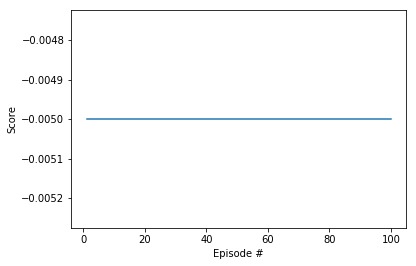

Episode 200	Average Score: -0.00	 Score: -0.00


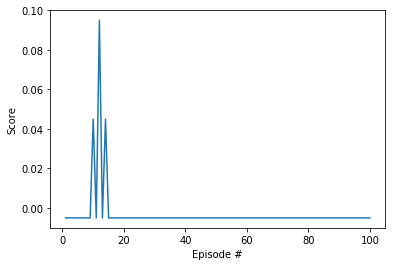

Episode 300	Average Score: -0.00	 Score: -0.00


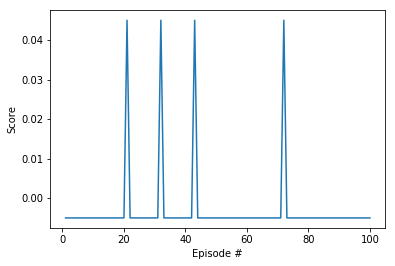

Episode 400	Average Score: 0.00	 Score: -0.000


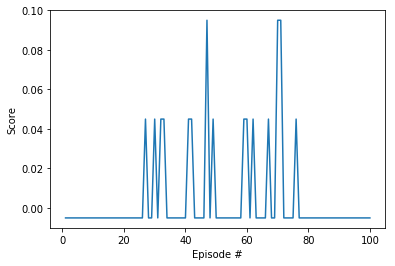

Episode 500	Average Score: 0.00	 Score: -0.00


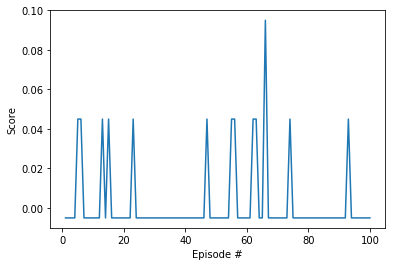

Episode 600	Average Score: 0.02	 Score: -0.00


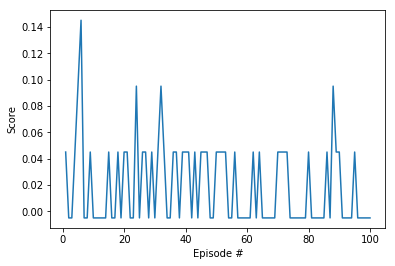

Episode 700	Average Score: 0.03	 Score: 0.050


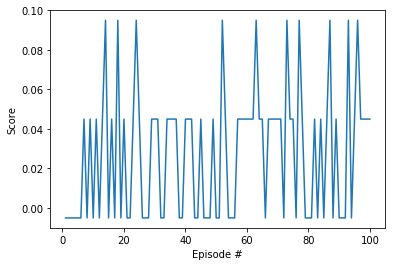

Episode 800	Average Score: 0.04	 Score: 0.050


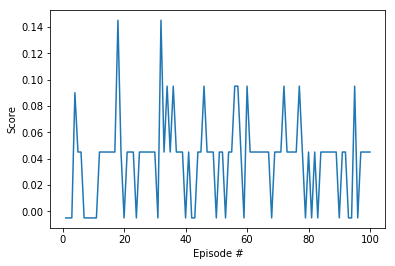

Episode 900	Average Score: 0.04	 Score: 0.200


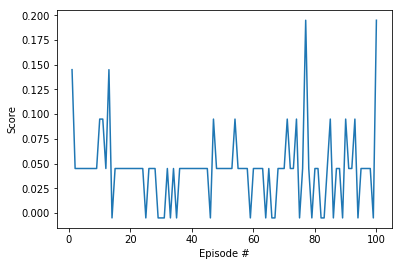

Episode 1000	Average Score: 0.05	 Score: 0.05


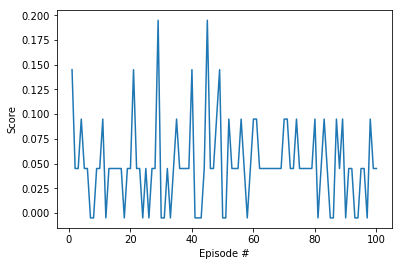

Episode 1100	Average Score: 0.04	 Score: 0.100


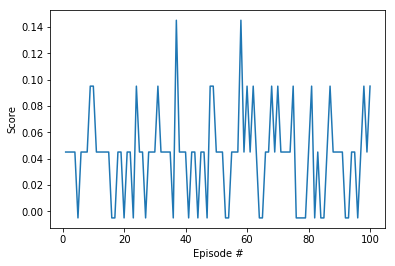

Episode 1200	Average Score: 0.06	 Score: 0.050


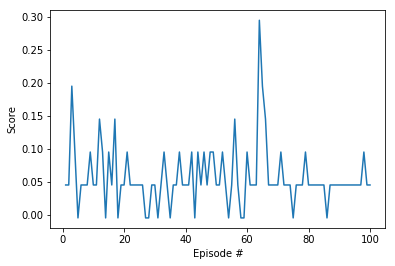

Episode 1300	Average Score: 0.06	 Score: 0.050


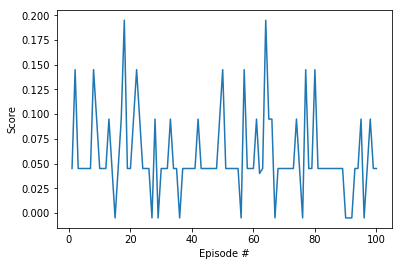

Episode 1400	Average Score: 0.06	 Score: 0.050


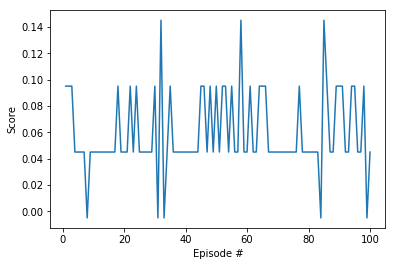

Episode 1500	Average Score: 0.07	 Score: 0.050


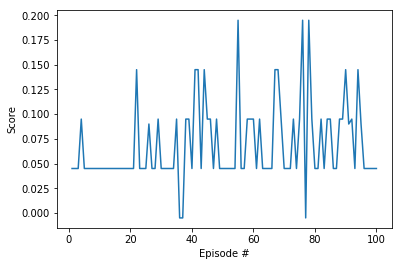

Episode 1600	Average Score: 0.06	 Score: 0.050


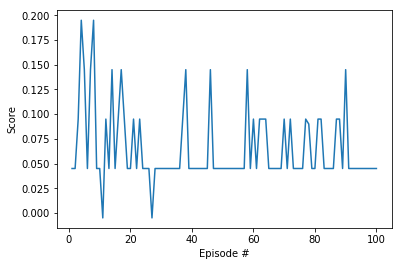

Episode 1700	Average Score: 0.07	 Score: 0.050


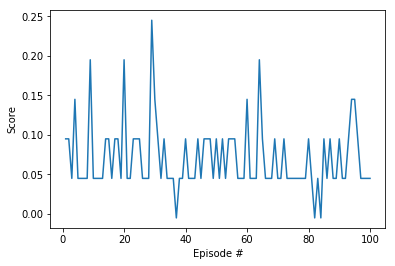

Episode 1800	Average Score: 0.06	 Score: 0.100


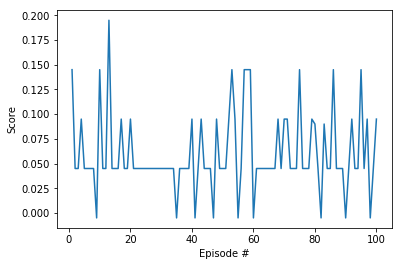

Episode 1900	Average Score: 0.07	 Score: 0.050


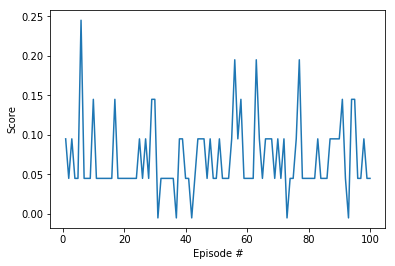

Episode 2000	Average Score: 0.07	 Score: 0.050


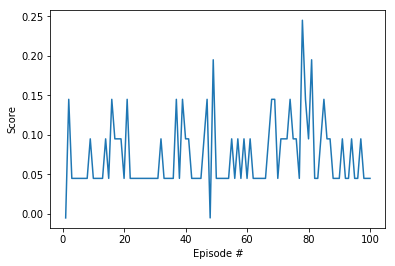

Episode 2100	Average Score: 0.09	 Score: 0.100


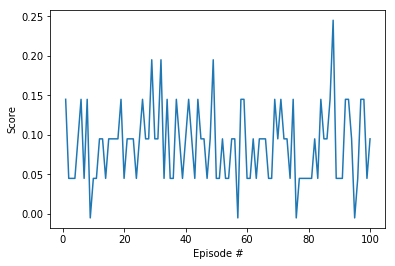

Episode 2200	Average Score: 0.10	 Score: 0.150


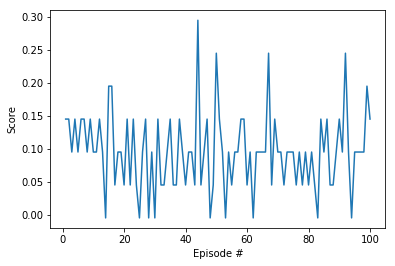

Episode 2300	Average Score: 0.12	 Score: 0.500


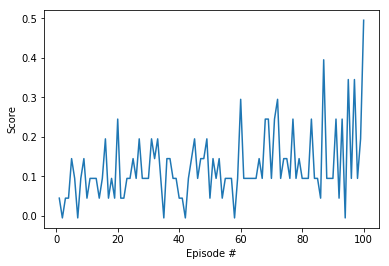

Episode 2400	Average Score: 0.19	 Score: 0.100


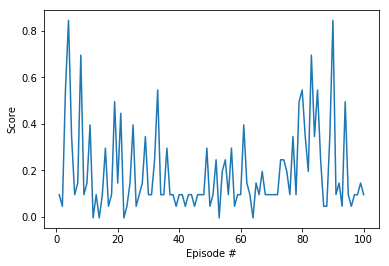

Episode 2490	Average Score: 0.39	 Score: 0.050

KeyboardInterrupt: 

In [5]:
from collections import deque
from ddpg_agent import Agent
import model
import torch

import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111)

agent0 = Agent(agents_num=2,agent_id=0,state_size=24, action_size=2,random_seed=2)#8
agent1 = Agent(agents_num=2,agent_id=1,state_size=24, action_size=2,random_seed=2)#8
agents = [agent0, agent1]

def maddpg(n_episodes=7000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    

    env_solved = False

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        [agent.reset() for agent in agents]
        score = 0
        for t in range(max_t):
            #print(states[0])
            actions = np.vstack([agent.act(states[i]) for i,agent in enumerate(agents)])
            actions2 = np.random.randn(num_agents, action_size) # select an action (for each agent)        
            actions2 = np.clip(actions2, -1, 1)
            #print('\nactions=',actions, type(actions))
            #print('\nactions2=',actions2, type(actions2))
            env_info = env.step(actions)[brain_name]            
            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            #print(rewards,end="")
            dones = env_info.local_done                 
            [agent.step(states, actions, rewards, next_states, dones,t) for agent in agents]               
            states = next_states
            score += np.mean(rewards)
            if np.any(dones):
                break 
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\t Score: {:.2f}'.format(i_episode, np.mean(scores_deque),score), end="")        
        
        if env_solved == False:
            if len(scores_deque) >= 100 and  np.mean(scores_deque) > 30 :
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_solved_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_solved_critic.pth')
                env_solved = True
        
        #if env_solved == True and score > 30:
        #    torch.save(agent.actor_local.state_dict(), 'checkpoint_solved_30+_actor.pth')
        #   torch.save(agent.critic_local.state_dict(), 'checkpoint_solved_30+_critic.pth')
            #break
            
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            plt.plot(np.arange(1, len(scores_deque)+1), scores_deque)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            for i,agent in enumerate(agents):
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_agent{}.pth'.format(i))
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_agent{}.pth'.format(i))
            
    return scores

scores = maddpg()


In [ ]:
from ddpg_agent import ReplayBuffer

buffer = ReplayBuffer(10,2)
buffer.add(action=[[5,0],[5,0]],state=[[[5,1],[5,1]]],reward=[[5,2],[5,2]],next_state=[[5,3],[5,3]],done=[[5,4],[5,0]])
buffer.add(action=[[5,10],[5,10]],state=[[[5,11],[5,11]]],reward=[[5,12],[5,12]],next_state=[[5,13],[5,13]],done=[[5,14],[5,10]])
states, actions, rewards, next_states, dones = buffer.sample()
print(states.size())
print(states)
print(states.view((2,-1)))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
from ddpg_agent import Agent
import torch

agent0 = Agent(agents_num=2,agent_id=0,state_size=24, action_size=2,random_seed=2)#8
agent1 = Agent(agents_num=2,agent_id=1,state_size=24, action_size=2,random_seed=2)#8
agents = [agent0, agent1]

for i,agent in enumerate(agents):
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor_agent{}.pth'.format(i),map_location=lambda storage, loc: storage))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic_agent{}.pth'.format(i),map_location=lambda storage, loc: storage))
            
for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.vstack([agent.act(states[i]) for i,agent in enumerate(agents)]) # select an action (for each agent)                
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.10000000149011612
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.490000007674098
Score (max over agents) from episode 6: 0.10000000149011612
Score (max over agents) from episode 7: 0.10000000149011612
Score (max over agents) from episode 8: 0.19000000320374966
Score (max over agents) from episode 9: 0.20000000298023224
